#Imports


In [25]:
!wget -O diabetes.csv "https://drive.google.com/uc?export=download&id=1cS9z4jFiDdQtqN0e3j8wD1vu_XFPkZr-"

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow import keras
from tensorflow.keras import layers
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, KFold


--2024-11-08 12:53:30--  https://drive.google.com/uc?export=download&id=1cS9z4jFiDdQtqN0e3j8wD1vu_XFPkZr-
Resolving drive.google.com (drive.google.com)... 108.177.11.100, 108.177.11.138, 108.177.11.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1cS9z4jFiDdQtqN0e3j8wD1vu_XFPkZr-&export=download [following]
--2024-11-08 12:53:30--  https://drive.usercontent.google.com/download?id=1cS9z4jFiDdQtqN0e3j8wD1vu_XFPkZr-&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13336 (13K) [application/octet-stream]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  13.02K  --.-KB/s   

#Data Loading and Preparation

The number of rows and columns is: 
(768, 5)
Glucose      int64
Insulin      int64
BMI        float64
Age          int64
Outcome      int64
dtype: object
          Glucose     Insulin         BMI         Age     Outcome
count  768.000000  768.000000  768.000000  768.000000  768.000000
mean   120.894531   79.799479   31.992578   33.240885    0.348958
std     31.972618  115.244002    7.884160   11.760232    0.476951
min      0.000000    0.000000    0.000000   21.000000    0.000000
25%     99.000000    0.000000   27.300000   24.000000    0.000000
50%    117.000000   30.500000   32.000000   29.000000    0.000000
75%    140.250000  127.250000   36.600000   41.000000    1.000000
max    199.000000  846.000000   67.100000   81.000000    1.000000

The missing vaues are: 
Glucose    0
Insulin    0
BMI        0
Age        0
Outcome    0
dtype: int64

The number of rows and columns after deletion of duplicates is: 
(768, 5)

Thus we have no missing values or duplicates and can proceed with scaling

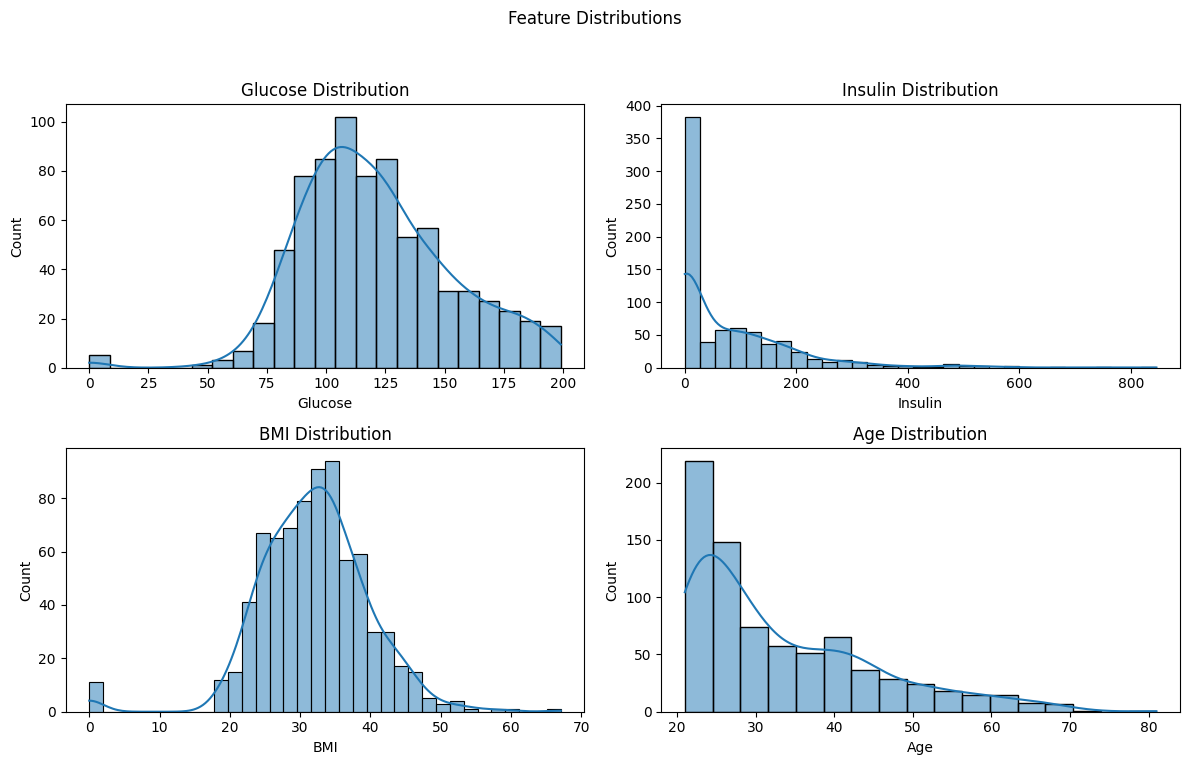


The correlation matrix is: 
          Glucose   Insulin       BMI       Age   Outcome
Glucose  1.000000  0.331357  0.221071  0.263514  0.466581
Insulin  0.331357  1.000000  0.197859 -0.042163  0.130548
BMI      0.221071  0.197859  1.000000  0.036242  0.292695
Age      0.263514 -0.042163  0.036242  1.000000  0.238356
Outcome  0.466581  0.130548  0.292695  0.238356  1.000000

Numerically, the number and percentage of zero's is: 

Insulin:
Number of zeros: 374
Percentage of zeros: 48.70%


BMI:
Number of zeros: 11
Percentage of zeros: 1.43%


Glucose:
Number of zeros: 5
Percentage of zeros: 0.65%


Since we detect the presence of a large no of zero's, we replace them with the median for each column
     Glucose  Insulin   BMI  Age  Outcome
0        148      125  33.6   50        1
1         85      125  26.6   31        0
2        183      125  23.3   32        1
3         89       94  28.1   21        0
4        137      168  43.1   33        1
..       ...      ...   ...  ...      ...


,Glucose,Insulin,BMI,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,140.671875,32.455208,33.240885,0.348958
std,30.438286,86.383060,6.875177,11.760232,0.476951
min,44.000000,14.000000,18.200000,21.000000,0.000000
25%,99.750000,121.500000,27.500000,24.000000,0.000000
50%,117.000000,125.000000,32.300000,29.000000,0.000000
75%,140.250000,127.250000,36.600000,41.000000,1.000000
max,199.000000,846.000000,67.100000,81.000000,1.000000


In [26]:
data_unedited = pd.read_csv('diabetes.csv')
rows_columns = data_unedited.shape

print("The number of rows and columns is: ")
print(rows_columns)
print(data_unedited.dtypes)
print(data_unedited.describe())

missing_values = data_unedited.isna().sum()
print("\nThe missing vaues are: ")
print(missing_values)

data_duplicates_deleted = data_unedited.drop_duplicates()
rows_columns_1 = data_duplicates_deleted.shape
print("\nThe number of rows and columns after deletion of duplicates is: ")
print(rows_columns_1)
print("\nThus we have no missing values or duplicates and can proceed with scaling.")

data = data_duplicates_deleted

print("Now we see if there's a presence of a large number of zero's in any of the columns")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Feature Distributions")

sns.histplot(data['Glucose'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Glucose Distribution')

sns.histplot(data['Insulin'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Insulin Distribution')

sns.histplot(data['BMI'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('BMI Distribution')

sns.histplot(data['Age'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

correlation_matrix = data.corr()
print("\nThe correlation matrix is: ")
print(correlation_matrix)

print("\nNumerically, the number and percentage of zero's is: ")
columns_to_check = ['Insulin', 'BMI', 'Glucose']
for column in columns_to_check:
    num_zeros = (data[column] == 0).sum()
    percent_zeros = (num_zeros / len(data)) * 100
    print(f"\n{column}:")
    print(f"Number of zeros: {num_zeros}")
    print(f"Percentage of zeros: {percent_zeros:.2f}%\n")

print("\nSince we detect the presence of a large no of zero's, we replace them with the median for each column")

data['Insulin'] = data['Insulin'].replace(0, data['Insulin'][data['Insulin'] != 0].median())
data['BMI'] = data['BMI'].replace(0, data['BMI'][data['BMI'] != 0].median())
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'][data['Glucose'] != 0].median())

print(data)
data.describe()

#Train, Test, Split and Naive Bayes Model

In [27]:
X = data.drop('Outcome',axis=1)
column_names = X.columns.tolist()
y = data['Outcome']

std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
X_scaled = std_scaler.fit_transform(X)
X_df = pd.DataFrame(X_scaled, columns=column_names)

X_train, X_test, y_train, y_test = train_test_split(X_df, y, train_size=0.8, random_state=69)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

y_pred_nb = naive_bayes_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {accuracy_nb}")

precision_nb = precision_score(y_test, y_pred_nb, average='binary')
print(f"Precision: {precision_nb}")

recall_nb = recall_score(y_test, y_pred_nb, average='binary')
print(f"Recall: {recall_nb}")

f1_nb = f1_score(y_test, y_pred_nb, average='binary')
print(f"F1: {f1_nb}")

#K-Fold Cross Validation
k = 5
scores_nb = cross_val_score(naive_bayes_model, X, y, cv=k, scoring='accuracy')
print("\nCross-validation scores for each fold:", scores_nb)
mean_scores_nb =  np.mean(scores_nb)
std_dev_scores_nb = np.std(scores_nb)
print("Mean accuracy:", np.mean(scores_nb))
print("Standard deviation of accuracy:", np.std(scores_nb))

#The model evaluation parameters aren't affected by scaling because
#Gaussian Naive Bayes (GNB) makes predictions based on the assumption that each
#feature follows a Gaussian (normal) distribution. It calculates probabilities
#based on the mean and variance of each feature and scaling transforms all
#features linearly without changing their underlying distributions.

Accuracy: 0.7727272727272727
Precision: 0.717391304347826
Recall: 0.6
F1: 0.6534653465346535

Cross-validation scores for each fold: [0.76623377 0.72077922 0.75974026 0.78431373 0.77124183]
Mean accuracy: 0.7604617604617604
Standard deviation of accuracy: 0.02141806109784772


#Perceptron Model (library implementation)

In [28]:
perceptron_model = Perceptron(max_iter=5000, tol=1e-3, random_state=23)
perceptron_model.fit(X_train,y_train)
y_pred_perceptron = perceptron_model.predict(X_test)

accuracy_p = accuracy_score(y_test, y_pred_perceptron)
print(f"Accuracy: {accuracy_p}")

precision_p = precision_score(y_test, y_pred_perceptron, average='binary')
print(f"Precision: {precision_p}")

recall_p = recall_score(y_test, y_pred_perceptron, average='binary')
print(f"Recall: {recall_p}")

f1_p = f1_score(y_test, y_pred_perceptron, average='binary')
print(f"F1: {f1_p}")

#K-Fold Cross Validation
k = 5
scores_p = cross_val_score(perceptron_model, X, y, cv=k, scoring='accuracy')
print("\nCross-validation scores for each fold:", scores_p)
mean_scores_p =  np.mean(scores_p)
std_dev_scores_p = np.std(scores_p)
print("Mean accuracy:", np.mean(scores_p))
print("Standard deviation of accuracy:", np.std(scores_p))

Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1: 0.6548672566371682

Cross-validation scores for each fold: [0.65584416 0.64935065 0.50649351 0.65359477 0.66666667]
Mean accuracy: 0.6263899499193617
Standard deviation of accuracy: 0.060219959027441206


#Perceptron Model (Custom Implementation)

In [29]:
class Custom_Perceptron:
  def __init__(self, learning_rate=0.01, epochs=1000):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    # Initialize weights and bias
    self.weights = np.zeros(n_features)
    self.bias = 0

    # Gradient descent for the specified number of epochs
    for _ in range(self.epochs):
        for idx, x_i in enumerate(X):
            linear_output = np.dot(x_i, self.weights) + self.bias
            y_predicted = self._step_function(linear_output)

            # Perceptron update rule
            update = self.learning_rate * (y[idx] - y_predicted)
            self.weights += update * x_i
            self.bias += update

  def predict(self, X):
    linear_output = np.dot(X, self.weights) + self.bias
    y_predicted = self._step_function(linear_output)
    return y_predicted

  def _step_function(self, x):
    return np.where(x >= 0, 1, 0)

In [30]:
custom_perceptron_model = Custom_Perceptron()
custom_perceptron_model.fit(X_train.values,y_train.values)
y_pred_custom_perceptron = custom_perceptron_model.predict(X_test.values)

accuracy_cp = accuracy_score(y_test, y_pred_custom_perceptron)
print(f"Accuracy: {accuracy_cp}")

precision_cp = precision_score(y_test, y_pred_custom_perceptron, average='binary')
print(f"Precision: {precision_cp}")

recall_cp = recall_score(y_test, y_pred_custom_perceptron, average='binary')
print(f"Recall: {recall_cp}")

f1_cp = f1_score(y_test, y_pred_custom_perceptron, average='binary')
print(f"F1: {f1_cp}")

Accuracy: 0.7467532467532467
Precision: 0.6904761904761905
Recall: 0.5272727272727272
F1: 0.5979381443298969


In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_cp = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    # Initialize and train the custom perceptron model on the training set
    custom_perceptron_model = Custom_Perceptron(learning_rate=0.01, epochs=1000)
    custom_perceptron_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = custom_perceptron_model.predict(X_test)

    # Calculate accuracy for this fold and add it to the list
    fold_accuracy = accuracy_score(y_test, y_pred)
    scores_cp.append(fold_accuracy)

print(f"\nCross-validation score for each fold: {scores_cp}")
mean_scores_cp = np.mean(scores_cp)
std_dev_scores_cp = np.std(scores_cp)
print(f"Mean accuracy: {mean_scores_cp:.2f}")
print(f"Standard Deviation of accuracy: {std_dev_scores_cp:.2f}")


Cross-validation score for each fold: [0.6428571428571429, 0.6493506493506493, 0.4025974025974026, 0.7124183006535948, 0.5947712418300654]
Mean accuracy: 0.60
Standard Deviation of accuracy: 0.11


#Comparing the 3 Models

##1)Accuracy and Recall

In [32]:
comparision = {
    'Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1_nb],
    'Perceptron (Lib)': [accuracy_p, precision_p, recall_p, f1_p],
    'Perceptron (Custom)': [accuracy_cp, precision_cp, recall_cp, f1_cp]
}
custom_indices = ['Acuracy', 'Precision', 'Recall', 'F1 Score']
comparison_table = pd.DataFrame(comparision, index = custom_indices)
print(comparison_table)

           Naive Bayes  Perceptron (Lib)  Perceptron (Custom)
Acuracy       0.772727          0.746753             0.746753
Precision     0.717391          0.637931             0.690476
Recall        0.600000          0.672727             0.527273
F1 Score      0.653465          0.654867             0.597938


##2) Based on K-Fold Cross Validation

In [33]:
comparision_1 = {
    'Naive Bayes K-Fold': [mean_scores_nb, std_dev_scores_nb],
    'Perceptron K-Fold(Lib)': [mean_scores_p, std_dev_scores_p],
    'Perceptron K-Fold(Cus)' : [mean_scores_cp, std_dev_scores_cp]
}
own_indices = ['Mean Accuracy', 'Standard Deviation of Accuracy']

comparison_table_1 = pd.DataFrame(comparision_1, index = own_indices)
print(comparison_table_1)

                                Naive Bayes K-Fold  Perceptron K-Fold(Lib)  \
Mean Accuracy                             0.760462                 0.62639   
Standard Deviation of Accuracy            0.021418                 0.06022   

                                Perceptron K-Fold(Cus)  
Mean Accuracy                                 0.600399  
Standard Deviation of Accuracy                0.105740  


##Analysis and Conclusion based on Metrics

###Analysis
**Accuracy**:
Naive Bayes has the highest accuracy (0.7727), suggesting it performs better at correctly classifying the overall samples than the Perceptron models.
Both Perceptron (Lib) and Perceptron (Custom) have the same accuracy (0.7467), slightly lower than Naive Bayes. This indicates that they both produce similar results, but may not generalize as well on this dataset.

**Precision**:
Naive Bayes has the highest precision (0.7174). This means that when it predicts the positive class, it's the most likely to be correct among the three models, which is valuable when false positives are costly.

**Recall**: Library Perceptron has the highest recall, which means it does better at catching true positives, followed by Naive Bayes. The Custom Perceptron has the lowest recall.

**F1 Score**: The Library Perceptron has the highest F1 score, indicating a balanced performance of precision and recall, while the Custom Perceptron has the lowest.

###Conclusion
**Naive Bayes**: Best overall precision and accuracy, suggesting it's highly effective in correctly identifying true positives while minimizing false positives.

**Library Perceptron**: Highest recall and F1 score, making it better for applications where identifying positive cases is a priority.

**Custom Perceptron**: Good precision but lower recall and F1 score, potentially useful for minimizing false positives but needing improvement to boost recall.

In general, the Naive Bayes model is the most reliable and effective choice for this dataset.

##Analysis and Conclusion based on K-Fold Cross Validation

###Analysis
**Naive Bayes K-Fold**:
* Mean Accuracy: 0.7605
* Standard Deviation: 0.0214

Naive Bayes consistently performs well across different folds. This indicates a stable model that’s less sensitive to changes in the training data.

**Perceptron (Library) K-Fold**:
* Mean Accuracy: 0.6264
* Standard deviation: 0.0602   

The moderate standard deviation suggests that the library Perceptron’s accuracy fluctuates more depending on the data, but it's relatively more stable than the custom implementation.

**Perceptron (Custom) K-Fold**:
* Mean Accuracy: 0.6004
* Standard Deviation: 0.1057

The high variability suggests that the custom Perceptron is very sensitive to the specific training data in each fold. This high variance may indicate overfitting in certain folds or instability due to its simplistic design.

###Conclusion
Naive Bayes is the best-performing and most stable model across the k-fold validation. It’s a good choice if consistent, high accuracy is a priority.

Library Perceptron has moderate performance with some variability, making it a decent alternative, especially if you're looking to improve recall.

Custom Perceptron has both the lowest accuracy and highest variability, implying it may need further tuning or improvements in design for better reliability and performance.

In general, the Naive Bayes model is the most reliable and effective choice for this dataset.

#Using Pickle to save the models

In [34]:
with open('naive_bayes_model.pkl', 'wb') as naive_bayes_file:
    pickle.dump(naive_bayes_model, naive_bayes_file)

with open('perceptron_model.pkl', 'wb') as perceptron_file_library:
    pickle.dump(perceptron_model, perceptron_file_library)

with open('custom_perceptron_model.pkl', 'wb') as perceptron_file_custom:
    pickle.dump(custom_perceptron_model, perceptron_file_custom)